In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load Data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Merge Datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [6]:
# Feature Engineering
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).rename(columns={'TotalValue': 'TotalSpend', 'Quantity': 'TotalItems', 'ProductID': 'UniqueProducts'})

In [7]:
# Normalize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

In [10]:
# Clustering Dataset Preparation
clustering_data = customer_features.copy()
scaled_clustering_data = scaler.fit_transform(clustering_data)

In [13]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_clustering_data)
clustering_data['Cluster'] = clusters

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_clustering_data, clusters)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8910331669978796


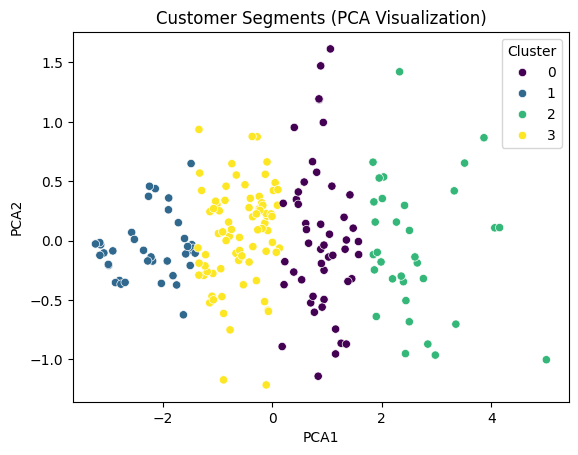

In [18]:
# Visualization with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_clustering_data)
clustering_data['PCA1'] = pca_data[:, 0]
clustering_data['PCA2'] = pca_data[:, 1]

sns.scatterplot(data=clustering_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()